In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset
insurance_data = pd.read_csv('C:\Github\Fiap_IA_Devs\Datasets\insurance.csv')

# Verificar os primeiros registros para entender a estrutura
#print(insurance_data.head())

# Verificar se há valores ausentes
missing_values = insurance_data.isnull().sum()


# One-Hot Encoding para as colunas categóricas
insurance_data = insurance_data.dropna()
df_insurance = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)
df_insurance = df_insurance.astype(float)


# Exibir as primeiras linhas do dataset transformado
print(df_insurance.head(5))


    age     bmi  children      charges  sex_male  smoker_yes  \
0  19.0  27.900       0.0  16884.92400       0.0         1.0   
1  18.0  33.770       1.0   1725.55230       1.0         0.0   
2  28.0  33.000       3.0   4449.46200       1.0         0.0   
3  33.0  22.705       0.0  21984.47061       1.0         0.0   
4  32.0  28.880       0.0   3866.85520       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


In [2]:
### Descritivo dos dados 
df_insurance.describe()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

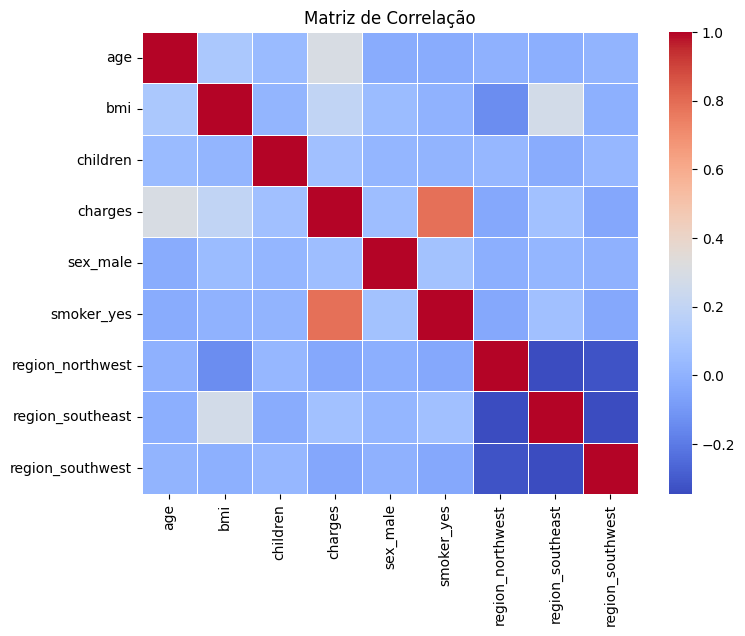

In [4]:
### Verificando correlação nos dados
# Criando dataframe somente com nossas variáveis numericas
df_fifa_numerico = df_insurance.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = df_fifa_numerico.corr()
correlation_matrix

# Visualização da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [5]:
correlation_matrix

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [6]:
######## Separando em treino e teste
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_insurance, test_size = 0.2, random_state = 7)

In [7]:
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


In [8]:
#### Extratificar a amostra com base na idade
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_insurance, df_insurance["age"]):
    strat_train_set = df_insurance.loc[train_index]
    strat_test_set = df_insurance.loc[test_index]

In [9]:
display(strat_test_set)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
949,25.0,29.700,3.0,19933.45800,1.0,1.0,0.0,0.0,1.0
606,27.0,25.175,0.0,3558.62025,0.0,0.0,0.0,0.0,0.0
830,63.0,33.100,0.0,13393.75600,1.0,0.0,0.0,0.0,1.0
1014,38.0,27.600,0.0,5383.53600,0.0,0.0,0.0,0.0,1.0
124,47.0,33.915,3.0,10115.00885,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
667,40.0,32.775,2.0,40003.33225,0.0,1.0,1.0,0.0,0.0
1055,55.0,27.645,0.0,10594.50155,1.0,0.0,1.0,0.0,0.0
494,21.0,25.700,4.0,17942.10600,1.0,1.0,0.0,0.0,1.0
874,44.0,21.850,3.0,8891.13950,1.0,0.0,0.0,0.0,0.0


In [10]:
# Analisando as proporções
strat_test_set["age"].value_counts() / len(strat_test_set)

age
19.0    0.052239
18.0    0.052239
27.0    0.022388
28.0    0.022388
51.0    0.022388
53.0    0.022388
25.0    0.022388
23.0    0.022388
48.0    0.022388
54.0    0.022388
50.0    0.022388
22.0    0.022388
20.0    0.022388
49.0    0.022388
47.0    0.022388
21.0    0.022388
24.0    0.022388
45.0    0.022388
52.0    0.022388
26.0    0.022388
46.0    0.022388
34.0    0.018657
38.0    0.018657
58.0    0.018657
56.0    0.018657
35.0    0.018657
42.0    0.018657
32.0    0.018657
36.0    0.018657
43.0    0.018657
59.0    0.018657
31.0    0.018657
40.0    0.018657
37.0    0.018657
33.0    0.018657
39.0    0.018657
60.0    0.018657
30.0    0.018657
29.0    0.018657
57.0    0.018657
41.0    0.018657
55.0    0.018657
44.0    0.018657
61.0    0.014925
64.0    0.014925
63.0    0.014925
62.0    0.014925
Name: count, dtype: float64

In [11]:
### Removendo a target do dataset de treino

df_train = strat_train_set.drop("charges", axis=1) # apagando a target para a base de treino (nosso x)
df_train_label = strat_train_set["charges"].copy() #armazenando a target (nosso y)


df_test = strat_test_set.drop("charges", axis=1)
df_test_label = strat_test_set["charges"].copy() #armazenando a target (nosso y)

In [12]:
df_test_label

949     19933.45800
606      3558.62025
830     13393.75600
1014     5383.53600
124     10115.00885
           ...     
667     40003.33225
1055    10594.50155
494     17942.10600
874      8891.13950
837     11657.71890
Name: charges, Length: 268, dtype: float64

In [13]:
######### Aplicando Regressão Linear #########
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
results = lin_reg.fit(df_train, df_train_label)

In [73]:
predictions = lin_reg.predict(df_test)
print("Previsões:", predictions)

Previsões: [29218.85863606  3687.91553733 13782.84890853  6048.05997291
 12606.62205178  7557.89499846 10861.78424578  5277.67981638
 26545.49702019 11603.12595157  9732.05293927 12356.69640583
 13794.48752935 26836.38595145  2546.66485181 16561.06953165
 11365.04446822  8806.06379148  3211.79273694 27427.50539944
 11055.75529273 10910.41544071 34844.98693207 12595.63991893
  5078.81337328  3927.67953127  1254.84032802  4032.67846039
 37496.69021765  2723.11997401  7579.82614797  3555.87651242
 27226.333488   10017.18075191  1851.41418592  6346.3033752
  7430.63557505 10107.8234113  -1673.34200637 12516.52725526
  5582.13811748 40002.1813048  10135.0209698  32368.75654521
 32154.5189949  29857.37655164 11304.92607232  -120.40894771
 11768.85790475  3901.56040014  8902.58490071 13180.7266277
 13469.98079326   918.40048104  7563.79125866 40750.53550429
  6374.65823742  1727.0120742  25938.11775504 12110.42057823
  2172.79167018  3666.6653458   9307.1532036  23794.8776512
  5156.24678439 

In [85]:
print(results.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [80]:
from sklearn.metrics import r2_score
mse = r2_score(df_test_label, predictions)
print("Squared Error (r2):", mse)

Squared Error (r2): 0.7031007204351096


In [1]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = df_train.iloc[:5]
some_labels = df_train_label.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(df_train)

print("Predictions:", lin_reg.predict(some_data_prepared))

NameError: name 'df_train' is not defined